# Matplotlib

Matplotlib is a multi-platform data visualization library built on NumPy arrays, and designed to work with the broader SciPy stack

People have been developing new packages that are built on top of Matplotlibs powerful internals to drive it via cleaner, more modern APIs—for example, Seaborn, ggpy, HoloViews, Altair, and even Pandas itself can be used as wrappers around Matplotlib's API.

Even with wrappers like these, it is still often useful to dive into Matplotlib's syntax to adjust the final plot output.

## Import Matplotlib

In [6]:
import numpy as np
import matplotlib.pyplot as plt

The plt interface is what we will use most often

matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

## Setting Styles

We will use the plt.style directive to choose appropriate aesthetic styles for our figures. Here we will set the classic style, which ensures that the plots we create use the classic Matplotlib style:

In [3]:
plt.style.use('classic')

## Plotting from an IPython notebook

Plotting interactively within an IPython notebook can be done with the %matplotlib command, and works in a similar way to the IPython shell. In the IPython notebook, you also have the option of embedding graphics directly in the notebook, with two possible options:

- %matplotlib notebook will lead to interactive plots embedded within the notebook
- %matplotlib inline will lead to static images of your plot embedded in the notebook

In [4]:
%matplotlib inline

## The Matplotlib Object Hierarchy

A Figure object is the outermost container for a matplotlib graphic, which can contain multiple Axes objects. One source of confusion is the name: an Axes actually translates into what we think of as an individual plot or graph (rather than the plural of “axis,” as we might expect).

You can think of the Figure object as a box-like container holding one or more Axes (actual plots). Below the Axes in the hierarchy are smaller objects such as tick marks, individual lines, legends, and text boxes. Almost every “element” of a chart is its own manipulable Python object, all the way down to the ticks and labels:

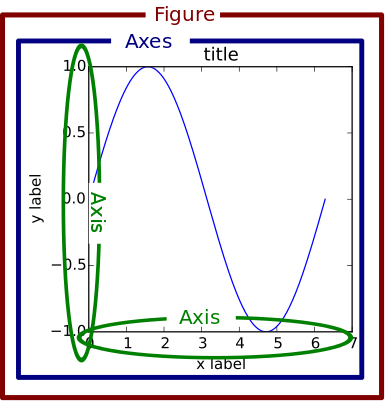

Here’s an illustration of this hierarchy in action. Don’t worry if you’re not completely familiar with this notation, which we’ll cover later on:

matplotlib.figure.Figure

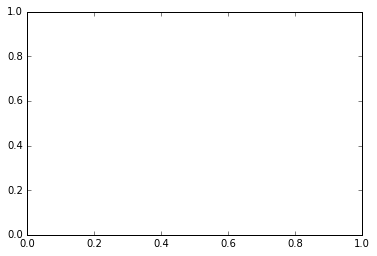

In [9]:
fig, _ = plt.subplots()
type(fig)

In [10]:
one_tick = fig.axes[0].yaxis.get_major_ticks()[0]
type(one_tick)

matplotlib.axis.YTick

Above, fig (a Figure class instance) has multiple Axes (a list, for which we take the first element). Each Axes has a yaxis and xaxis, each of which have a collection of “major ticks,” and we grab the first one.

Matplotlib presents this as a figure anatomy, rather than an explicit hierarchy:

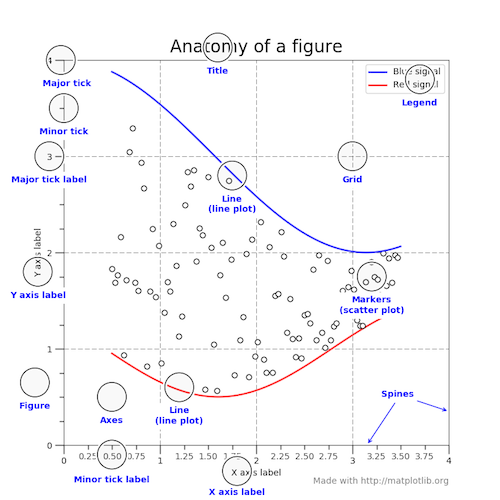

## Two Interfaces for the Price of One

A potentially confusing feature of Matplotlib is its dual interfaces: a convenient MATLAB-style state-based interface, and a more powerful object-oriented interface. We'll quickly highlight the differences between the two here.

### MATLAB-style Interface

Matplotlib was originally written as a Python alternative for MATLAB users, and much of its syntax reflects that fact. The MATLAB-style tools are contained in the pyplot (plt) interface. For example, the following code will probably look quite familiar to MATLAB users:

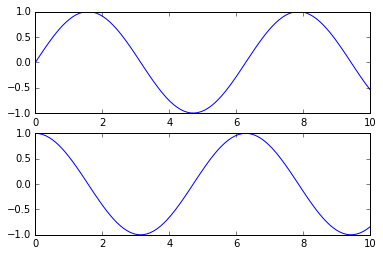

In [7]:
x = np.linspace(0, 10, 100)
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

While this stateful interface is fast and convenient for simple plots, it is easy to run into problems. For example, once the second panel is created, how can we go back and add something to the first? This is possible within the MATLAB-style interface, but a bit clunky. Fortunately, there is a better way.

### Object-oriented interface

The object-oriented interface is available for these more complicated situations, and for when you want more control over your figure. Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are methods of explicit Figure and Axes objects. To re-create the previous plot using this style of plotting, you might do the following:

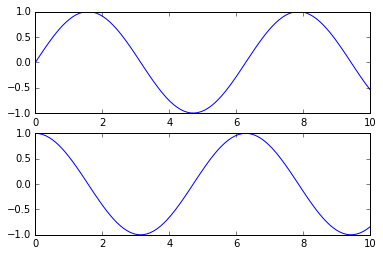

In [8]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

## Simple Line Plots

Perhaps the simplest of all plots is the visualization of a single function y=f(x). Here we will take a first look at creating a simple plot of this type. 

We can use the pylab interface and let the figure and axes be created for us in the background:

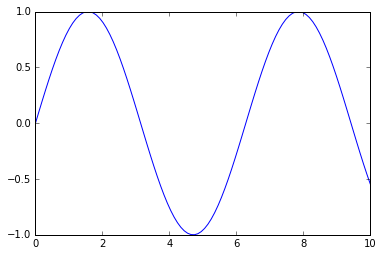

In [11]:
plt.plot(x, np.sin(x));

#### Quick Exercise:

<font color=blue>Plot same line using object-oriented interface to Matplotlib:</font>

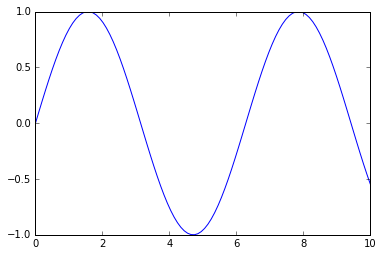

In [16]:
# Your code goes here:


### Adjusting the Plot: Line Colors and Styles

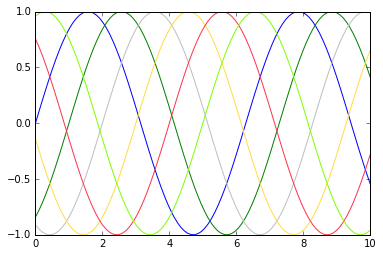

In [17]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

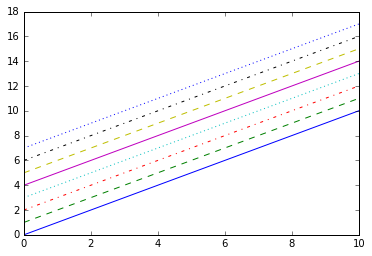

In [18]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

If you would like to be extremely terse, these linestyle and color codes can be combined into a single non-keyword argument to the plt.plot() function:

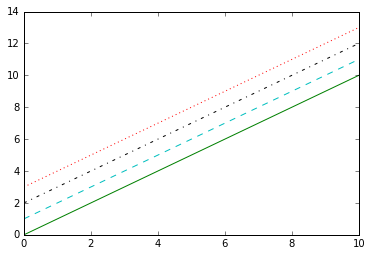

In [19]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

### Adjusting the Plot: Axes Limits

The most basic way to adjust axis limits is to use the plt.xlim() and plt.ylim() methods:

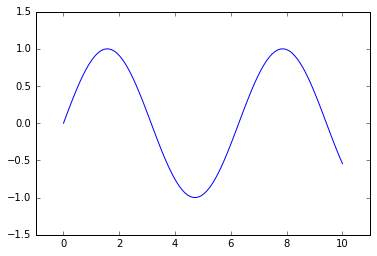

In [22]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

A useful related method is plt.axis() (note here the potential confusion between axes with an e, and axis with an i). The plt.axis() method allows you to set the x and y limits with a single call, by passing a list which specifies [xmin, xmax, ymin, ymax]:

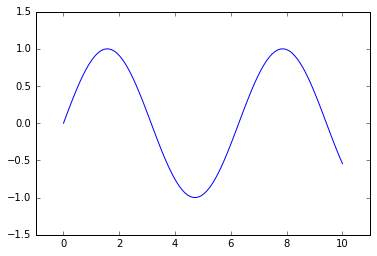

In [24]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

### Labeling Plots

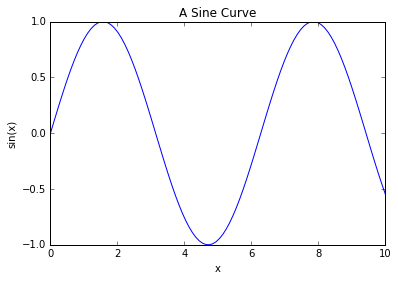

In [20]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

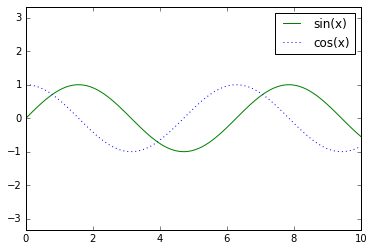

In [21]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

As you can see, the plt.legend() function keeps track of the line style and color, and matches these with the correct label. More information on specifying and formatting plot legends can be found in the plt.legend docstring

### Object Orineted Interface Hints

For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:

- plt.xlabel() → ax.set_xlabel()
- plt.ylabel() → ax.set_ylabel()
- plt.xlim() → ax.set_xlim()
- plt.ylim() → ax.set_ylim()
- plt.title() → ax.set_title()

#### Quick Exercise:
<font color=blue>Produce a figure with two subplots - one of sin and another of cos curve with an appropriate title and labels using object oriented interface.</font>

In [27]:
# Your code goes here:


## Iris Flower Dataset Exercise:

As an example and exercise we will explore one of the most famous data sets in Machine Learning - Irist Flower Dataset.

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

Text(0, 0.5, 'sepal width (cm)')

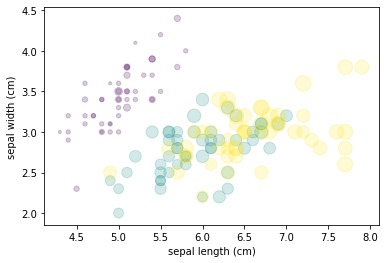

In [7]:
plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

#### Exercise:
1. <font color=blue>Explore the iris data set, first in its raw form (dictionary of arrays) and then port the features to pandas data frame. </font>
2. <font color=blue>Try producing some basic statistics such as mean and variance for different classes and features, and see if it gives you any insight into the difference between different flowers.</font>
3. <font color=blue>Above scatter plot diplays conveniently the difference between sepal width and sepal length for different flowers. Try understanding how that plot was produced. If you get stuck explore the documentation for scatter plot here: </font> https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
4. <font color=blue>Plot same scatter plot for comparison of petal width and lenght. Does it split the flowers into more clear classes?</font>
5. <font color=blue>Now see if you can graph a 3D scatter plot with different features and see which one splits the data into appropriate classes the most. If you need any help there is an example at the following link: </font> https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [1]:
# Your code goes here
